# Bank Marketing Campaign

## A. Context

Salah satu instrumen keuangan yang sudah dikenal masyarakat secara luas adalah term deposit. Pada term deposit, nasabah menitipkan sejumlah uang di bank dan uang tersebut baru dapat dicairkan setelah jangka waktu tertentu, sesuai kesepakatan di awal. Sebagai imbalannya, bank akan memberikan bunga tetap sesuai dengan jumlah nominal uang yang dititipkan. Sebagai perusahaaan yang bergerak di industri yang cukup kompetitif, untuk meningkatkan jumlah penerbitan term deposit, bank perlu memahami perilaku nasabah sehingga marketing campaign sebagai salah satu media untuk menarik minat para nasabah dapat dilaksanakan secara efektif dan optimal. 

## B. Problem Statement
Marketing campaign tentunya membutuhkan banyak sumberdaya, baik dari sisi keuangan, SDM dan juga waktu. Tanpa adanya kejelasan target (segmentasi) dan metode pemasaran yang optimal, maka marketing campaign menjadi sebuah gambling (mungkin sukses, mungkin gagal tanpa adanya kontrol). Untuk itu, apabila perusahaan mengharapkan kenaikan rate penerbitan deposito dengan adanya marketing campaign, maka perusahaan perlu mengurangi risiko kegagalan marketing campaign dengan cara membuat model prediksi penerbitan deposito berjangka berdasarkan profil nasabah dan metode marketing campaign yang digunakan.

Sumberdaya yang dikeluarkan untuk marketing campaign dapat direpresentasikan dalam bentuk nominal biaya pemasaran. Estimasi biaya pemasaran per nasabah/customer disebut dengan Customer Acquisition Cost dan dihitung dengan formula berikut:

CAC = Total Spend on Sales or Marketing ÷ Customers Acquired

Nilai CAC berbeda berdasarkan distribution channel, dimana terdapat 2 tipe distribution channel sebagai berikut:
|Channel| Description |
|---|---|
|Organic (Earned Traffic)| These channels include SEO, social media, email marketing, and other forms of marketing where it does not cost incrementally more money to gather more ad impressions.|
|Paid (Bought Traffic) |These channels include Google & Meta Ads, radio ads, TV ads, print ads, and other forms of marketing where to reach more people, more money must be spent in a generally linear fashion|

Berdasarkan data di bawah ini, biaya marketing melalui bought traffic untuk sertifikat deposito adalah sebesar **USD 176**.

sumber: https://focus-digital.co/average-banking-customer-acquisition-cost/#location

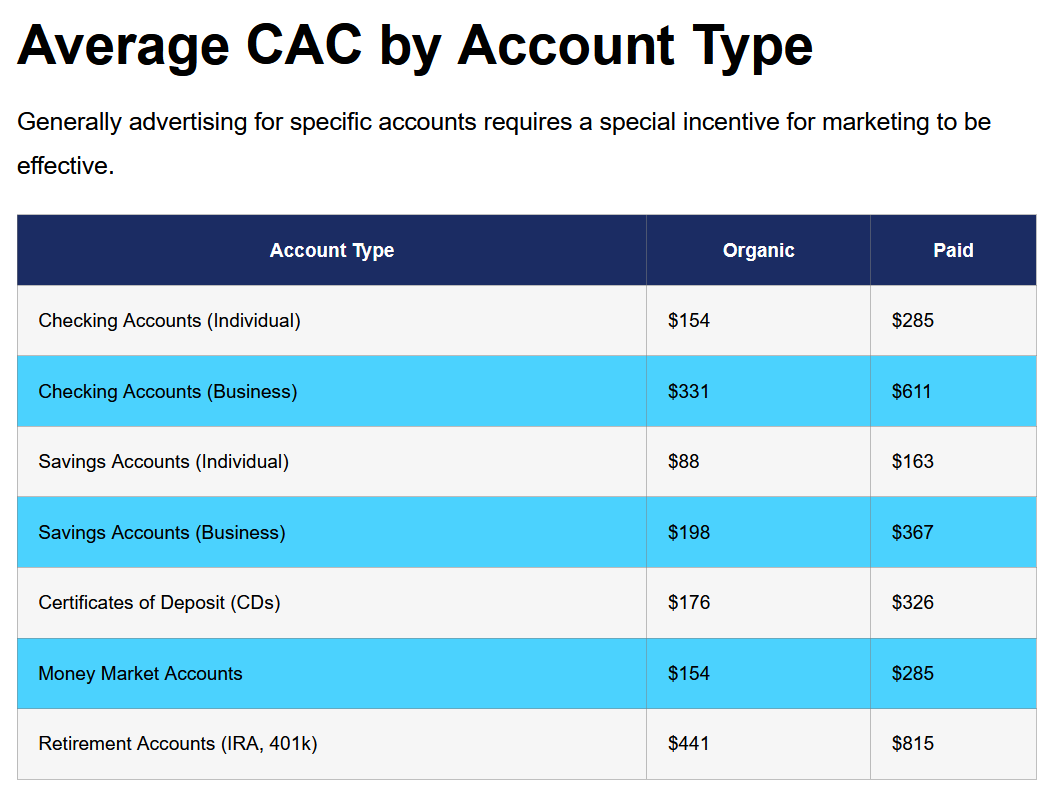


## C. Goals
Berdasarkan permasalahan yang dipaparkan sebelumnya, maka akan dilakukan beberapa tahapan berikut:
1. Menaganalisis faktor-faktor yang memengaruhi keputusan nasabah untuk membuka term deposit, baik dari sisi profil nasabah maupun metode marketing
1. Mengidentifikasi segmentasi pelanggan yang berpotensi untuk membuka term deposit
1. Membentuk model prediksi pembukaan term deposit berdasarkan profil nasabah dan metode marketing
1. Melakukan simulai what if analysis, yaitu dengan cara membandingkan:
    - Total biaya yang dikeluarkan jika marketing campaign dilaksanakan ***tanpa*** mempertimbangkan prediksi pembukaan term deposit
    - Total biaya yang dikeluarkan jika marketing campaign dilaksanakan ***dengan*** mempertimbangkan prediksi pembukaan term deposit
1. Mengembangkan marketing campaign yang lebih menarik, optimal, terarah dan lebih efisien.

## D. Data
|Customer profile| Keterangan|Tipe Variabel|
|---|---|---|
|Age|Usia|Explanatory - Numerikal|  
|Job|Pekerjaan|Explanatory - Nominal|
|Balance|Balance|Explanatory - Numerikal|
|Housing|Memiliki atau tidak memiliki pinjaman rumah|Explanatory - Nominal|
|loan|Memiliki pinjaman|Explanatory - Nominal|
|contact|Jalur komunikasi|Explanatory - Nominal|
|month|Bulan akhir dari Last contact|Explanatory - ordinal|
|campaign|Jumlah kontak sepanjang marketing campaign|Explanatory - Numerikal|
|pdays|Lama hari dari kontrak terakhir|Explanatory - Numerikal|
|poutcome|Outcome dari marketing campaign sebelumnya|Explanatory - Nominal|
|deposit|Informasi apakah nasabah membuka deposit atau tidak|Target-Nominal|

## E. Analytic Approach
Berdasarkan tujuan analisis di atas, maka perusahaan ingin mengetahui apakah seseorang akan membuka/tidak membuka deposito berjangka berdasarkan profil nasabah dan metode marketing tertentu.

Response Variable/ Target/ Independent Variable = Deposit

1 : Membuka deposito

0 : Tidak membuka deposito

Oleh karena itu, perlu dilakukan analisis kategori pelanggan. Metode yang tepat untuk digunakan pada analisis ini adalah metode klasifikasi, diantaranya:
1. Logistic Regression
1. KNN (K-Nearest Neighbour)
1. Decision Trees
1. Support Vector Machines (SVM) / Support Vector Classifier (SVC)
1. Ensemble Various Type : Hard Vote dan Stacking
1. Ensemble Single Type : Bagging, Random Forest, Extra Gradient Boosting dan Light Boosting
1. etc.

Adapun proses pembentukan model yang akan dilakukan adalah sbb:
1. 
1. Membentuk 4 base model (logistic Regression, KNN, Decision Tree dan SVM) dengan cara mencari parameter model yang memiliki metric score terbaik untuk masing-masing model.
1. Membentuk ensemble model untuk various type (hard vote dan stacking) berdasarkan 3 dari 4 model dengan metric score terbaik pada poin 1
1. Membentuk ensemble model untuk single type (Bagging, random forest dan boosting). Untuk bagging, estimator dipilih dari 1 model terbaik pada poin 1
1. Melakukan cross validation untuk memastikan bahwa dengan adanya perubahan sampling, metric score masih tetap stabil
1. Melakukan hyperparameter tuning agar memperoleh model terbaik
1. Melakukan analisis kuangan terhadap model yang dihasilkan


## F. Metric Classification
Type 1 Error (False Positive)
  - Diprediksi membuka deposito namun kenyataannya tidak
  - Konsekuensi : kerugian atas sumber daya pemasaran yang dikeluarkan

Type 2 Error (False Negative)
  - Diprediksi tidak membuka deposito namun kenyataannya membuka
  - Konseskuensi : Kehilangan kesempatan pembukaan deposito baru

Dari type error di atas, false positif lebih merugikan daripada false negative, sehingga:
- False positive rate diharapkan mendekati nol
- Positive prediction diharapkan sangat akurat

Oleh karena itu metric yang akan digunakan adalah **precision**

precision = (TP)/(TP+FP)

Model akan dipilih berdasarkan nilai precision terbesar.

In [85]:
#Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Feature Engineering
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler
import category_encoders as ce
from scipy.stats import chi2_contingency

#Imput missing value
from sklearn.impute import SimpleImputer

#Split train test
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,StratifiedKFold,train_test_split, cross_val_score

# ML Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

# Ensamble
from sklearn.ensemble import VotingClassifier, StackingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Metric
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

# Pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

#Display dt graph
from sklearn import tree
import graphviz

## G. Data Exploration and  Data Preparation

Beberapa pengecekan data dan pembersihan data yang akan dilakukan mencakup:
1. Drop kolom yang tidak digunakan pada analisis
2. Penanganan Missing Values
2. Penanganan Duplikasi data
4. Cek Konsistensi informasi antar kolom
5. Cek dan penyesuaian tipe data

In [86]:
data=pd.read_csv("data_bank_marketing_campaign.csv")
data.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


In [88]:
# Check for duplicate data
cek_duplicates = data.duplicated(subset=data.columns).sum()
print(cek_duplicates)

8


Note:
1. Total data sebanyak 7813 baris dan tidak terdapat missing value
1. Terdapat 8 data duplicate (sama nilainya untuk semua kolom pada data, termasuk kolom yang nantinya menjadi target variable), sehingga perlu diexclude karena data duplicate hanya memperbesar volume dari data tanpa menambahkan improvement terhadap model yang akan dibuat. Apabila terdapat duplicate (misalnya menjadi 4 baris), maka hanya data pertama yang akan dipertahankan.
1. Semua kolom numerik sudah bertipe int64 dan semua kolom kategori bertipe object. Untuk kolom kategori selanjutnya perlu diterapkan encoding.
1. Terdapat data dengan pengisian "unknown". Akan dicek lebih lanjut seberapa banyak jumlah data "unknown", karena data unknown sama saja dengan missing data

In [89]:
# Drop duplicate data 
data.drop_duplicates(keep="first",inplace=True) #Apabila data terduplicate (misal menjadi 4 baris), maka hanya data paling pertama yang dipertahankan

In [90]:
# Extract nama kolom categorical dan numerical
kat = data.select_dtypes(include=['object']).columns.tolist()
num = data.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical:",kat)
print("Numerical:", num)

Categorical: ['job', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']
Numerical: ['age', 'balance', 'campaign', 'pdays']


In [91]:
# Cek Jumlah baris Unknow pada Categorical Variable
listItem = []
for col in kat :
        listItem.append([col, data[col].dtype, data[col].isna().sum(), round((data[col].isna().sum()/len(data[col])) * 100,2),
                    data[col].nunique(), list(data[col].drop_duplicates()), (data[col].str.upper()=="UNKNOWN").sum(),(data[col].str.upper()=="UNKNOWN").sum()/data.shape[0]*100]);

dfDesc = pd.DataFrame(columns=['Variables', 'DataType', 'null', 'nullPct', 'unique', 'uniqueSample',"Count_Unknown","% Unknown"],
                     data=listItem)
dfDesc

,Variables,DataType,null,nullPct,unique,uniqueSample,Count_Unknown,% Unknown
0,job,object,0,0.0,12,"[admin., self-employed, services, housemaid, t...",54,0.691864
1,housing,object,0,0.0,2,"[no, yes]",0,0.000000
2,loan,object,0,0.0,2,"[no, yes]",0,0.000000
3,contact,object,0,0.0,3,"[cellular, telephone, unknown]",1636,20.960922
4,month,object,0,0.0,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ...",0,0.000000
5,poutcome,object,0,0.0,4,"[unknown, other, failure, success]",5811,74.452274
6,deposit,object,0,0.0,2,"[yes, no]",0,0.000000


Analisis data unknown:
1. Kolom job: baris unknown hanya sedikit (<1%). Baris unknown tidak dibuang dan akan dimasukkan dalam kategori unemployed, karena:
    - Berdasarkan volume data tidak akan banyak mempengaruhi hasil model
    - Umumnya job tidak diisi karena belum/tidak bekerja
1. Kolom contact: baris unknown sebanyak 21%. Dapat direpresentasikan dulu sebagai kategori other karena:
    - 20% data tidak cukup besar untuk melakukan drop kolom, karena jalur komunikasi merupakan salah satu indikator penting dalam marketing
    - Namun, 20% data cukup besar apabila row dihapuskan (persentase 20% mengindikasikan ke depannya data dengan kondisi serupa masih mungkin ditemukan)
    - Agar model masih tetap dapat memprediksi data dengan contact unknown ke depannya, sehingga akan dibuat kategori others.
1. Kolom poutcome: sebagian besar (74%) bernilai unknown, sehingga perlu di drop dari variable explanatory karena apabila sebagian besar tidak diketahui, maka relasi antara kolom pcoutcome dan deposito sulit untuk diinterpretasikan seperti missing data.

In [92]:
# Baris dari kolom job yang berisi unknown direplace dengan unemployed
data.loc[data["job"].str.upper()=="UNKNOWN","job"]="unemployed"

# Baris dari kolom contact yang bernilai unknown diubah menjadi other
data.loc[data["contact"].str.upper()=="UNKNOWN","contact"]="other"

# Kolom poutcome didrop karena 74% unknown (akan sulit untuk diartikan)
data.drop(columns="poutcome",inplace=True)

# Re-Define kolom categorical dan numerical setelah drop kolom
kat = data.select_dtypes(include=['object']).columns.tolist()
num = data.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical:",kat)
print("Numerical:", num)

Categorical: ['job', 'housing', 'loan', 'contact', 'month', 'deposit']
Numerical: ['age', 'balance', 'campaign', 'pdays']


In [93]:
# Cek data final yang akan digunakan
data.reset_index(inplace=True)
data.drop(columns="index",inplace=True)
data.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,yes
2,51,admin.,3025,no,no,cellular,may,1,352,yes
3,38,services,-87,yes,no,cellular,may,1,-1,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,no


In [94]:
# Cek data final yang akan digunakan
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7805 non-null   int64 
 1   job       7805 non-null   object
 2   balance   7805 non-null   int64 
 3   housing   7805 non-null   object
 4   loan      7805 non-null   object
 5   contact   7805 non-null   object
 6   month     7805 non-null   object
 7   campaign  7805 non-null   int64 
 8   pdays     7805 non-null   int64 
 9   deposit   7805 non-null   object
dtypes: int64(4), object(6)
memory usage: 609.9+ KB


Setelah menangani unknow values dan duplicate values, maka data yang selanjutnya akan digunakan berjumlah 7805 baris.

### H. Imbalance Test

- Imbalance Test dilakukan dengan mengecek keseimbangan nilai dari target variabel. Dalam hal ini apakah deposito yang bernilai "yes" memiliki jumlah baris yang kurang lebih sama dengan baris dengan deposito bernilai "no". 
- Apabila terdapat indikasi imbalance, maka perlu dilakukan balancing, karena apabila data imbalance, maka model akan memiliki kecenderungan misklasifikasi terhadap data yang bersifat minoritas. Akibatnya, apabila target variable yang menjadi fokus analisis (deposit=1) bersifat minoritas, maka model menjadi tidak akurat.

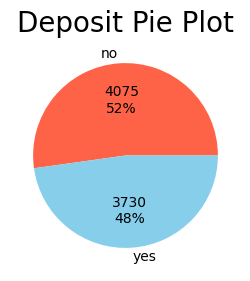

In [95]:
#Imbalance Check
plt.figure(figsize=(3,3))
def label_function(val):
    return f'{val / 100 * len(data):.0f}\n{val:.0f}%'

data.groupby(["deposit"]).size().plot(kind="pie",autopct=label_function, textprops={'fontsize': 10},colors=['tomato','skyblue'])
plt.title('Deposit Pie Plot',fontsize=20)
plt.show()

Hasil: Proporsi data deposit di atas mendekati 50:50, sehingga dapat disimpulkan bahwa **tidak terjadi imbalance** dan tidak perlu dilakukan proses balancing.

## I. Analisis Data Categorical

Selanjutnya akan dilihat hubungan antara masing-masing variable kategorikal dengan deposito menggunakan 2 pendekatan, yaitu:
1. Chi square test
1. Visualisasi Bar Chart

Sebelum melanjutkan, untuk mempermudah analisis, nama bulan terlebih dahulu diubah dalam bentuk angka.

### I1. Chi Square Test (Association of Categorical Data)

Akan dilakukan uji hipotesis untuk menentukan apakah masing-masing categorical variable memiliki asosiasi yang kuat dengan variable target (kolom deposito)

H0: Kedua variable kategorikal tidak berasosiasi
H1: Kedua variable memiliki asosiasi

1. H0 tidak ditolak jika p value > 0.05
1. H0 ditolak jika p value < 0.05

In [96]:
# Chi square test
stats=[]
ps=[]
dof=[]
alpha=0.05

for i in kat[:-1]:
    chisqt = pd.crosstab(data[i].tolist(), data["deposit"].tolist(), margins=True)
    stat, p, dof, expect = chi2_contingency(chisqt )
    stats.append(stat)
    ps.append(p)

chi2test=pd.DataFrame({
    "Categorical Variable": kat[:-1],
    "P-values": ps,
    "Statistik": stats,
    "Degree of Freedom": dof
})
chi2test.loc[chi2test["P-values"]>alpha,"Keputusan"]="Tidak Berasosiasi"
chi2test.loc[chi2test["P-values"]<=alpha,"Keputusan"]="Berasosiasi"
chi2test

,Categorical Variable,P-values,Statistik,Degree of Freedom,Keputusan
0,job,4.108611e-43,262.701809,24,Berasosiasi
1,housing,3.025319e-74,348.903288,24,Berasosiasi
2,loan,8.308589e-24,114.417578,24,Berasosiasi
3,contact,1.000233e-116,555.333070,24,Berasosiasi
4,month,3.348022e-136,718.388819,24,Berasosiasi


Berdasarkan hasil di atas, dapat disimpulkan bahwa seluruh variabel kategorikal memiliki asosiasi dengan variabel target (kolom deposito). Asosiasi ini juga dapat diamati secara visual.

### I2. Data Visualization (Association of Categorical Data)

In [97]:
# Ubah nama bulan menjadi angka
import datetime
for i,j in enumerate(data["month"]): 
    data.loc[i,"month"]=datetime.datetime.strptime(data.loc[i,"month"],'%b').month
data["month"]=data["month"].astype("Int64")

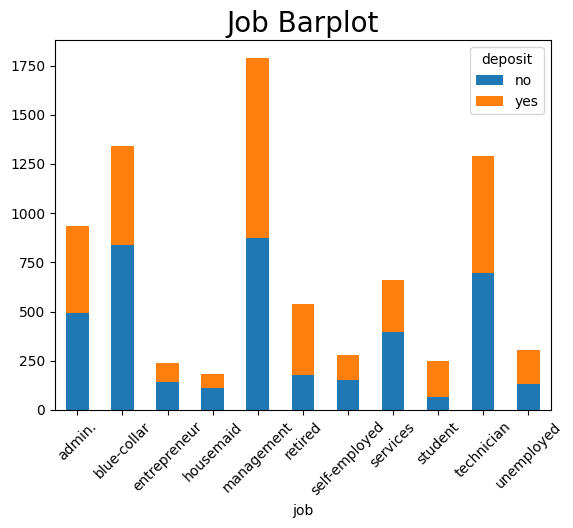

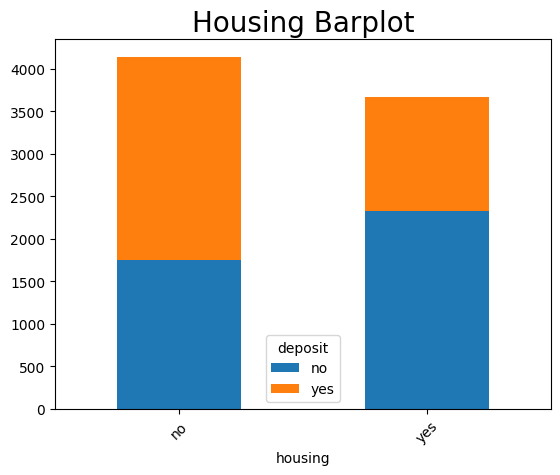

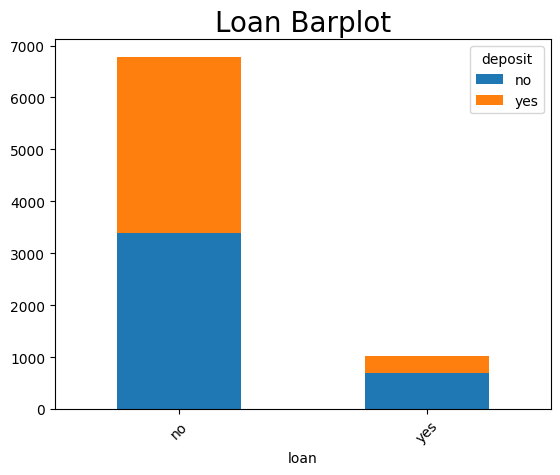

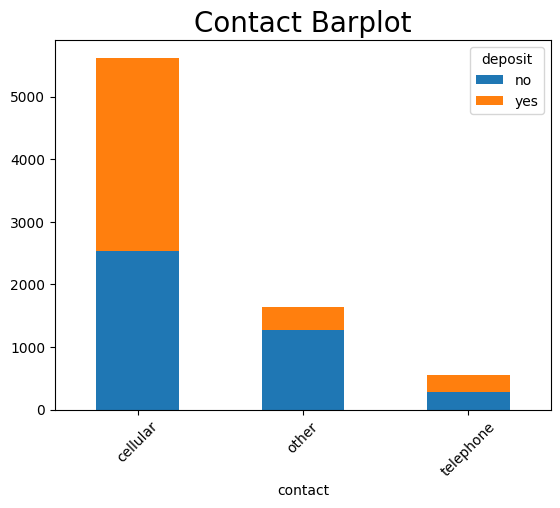

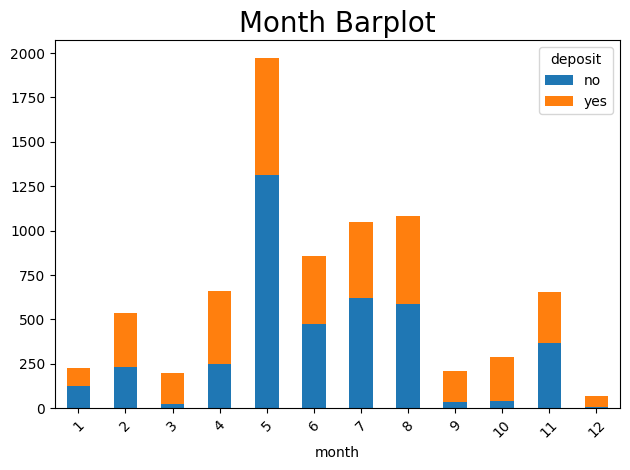

In [98]:
# Create bar plot for all categorical data
for i,j in enumerate(kat):
    if i==len(kat)-1:
       break
    data_plot = data.groupby(['deposit',j]).size().reset_index().pivot(columns='deposit', index=j, values=0)
    data_plot.plot(kind='bar', stacked=True)
    plt.title(j.capitalize()+' Barplot',fontsize=20)
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()


Hasil analisis berdasarkan Barplot dari data kategori:
1. Terdapat beberapa kategori job yang memiliki kecenderungan lebih besar untuk membuka deposito, yaitu retirement,student dan management
1. Nasabah yang **tidak** memiliki home loan/loan memiliki kecenderungan lebih besar untuk membuka deposito dibandingkan dengan yang memiliki home loan/loan
1. Terdapat indikasi bahwa metode kontak sangat mempengaruhi pembukaan deposito. Dalam hal ini metode kontak melalui celluler terindikasi paling efektif.
1. Terdapat bulan-bulan dimana komposisi yang membuka deposito lebih tinggi, yaitu di bulan maret, september, oktober dan desember (bisa jadi ini adalah indikasi seasonality)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

## J. Analisis Data Numerik

In [99]:
data[num].describe(percentiles=[0.10,0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).transpose()

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
age,7805.0,41.257783,11.922833,18.0,28.0,32.0,39.0,49.0,58.0,62.0,77.00,95.0
balance,7805.0,1513.968225,3090.508938,-6847.0,0.0,128.0,550.0,1685.0,3810.0,6138.0,13334.56,66653.0
campaign,7805.0,2.520564,2.728204,1.0,1.0,1.0,2.0,3.0,5.0,7.0,13.00,63.0
pdays,7805.0,51.462268,108.115084,-1.0,-1.0,-1.0,-1.0,41.0,192.0,323.0,420.96,854.0


1. Age: Nasabah memiliki rentang umur 18-95 tahun. Sebagian besar nasabah (90%) berusia di bawah 58 tahun.
1. Balance: 10% nasabah memiliki balance <=0. Hanya ada beberapa nasabah (<1%) yang memiliki balance melebihi 13.400
1. Campaign: Terdapat beberapa klien yang memiliki frekuensi kontak sangat banyak hingga 63 kali, sedangkan sebagian (50%) hanya dikontak maksimum 2 kali (ada ketidakseimbangan). Akan dianalisis lebih lanjut frekuensi kontak yang banyak berasal dari nasabar dengan karaketristik seperti apa.
1. pdays: sebagian (50%) belum pernah dikontak setelah campaign dilakukan

#### J1. Age Vs Deposit

Asosiasi antara age dan deposit akan dianalis dengan:
1. Melihat histogram data usia
1. Melihat lineplot dari persentase pembukaan deposito di setiap titik usia

Text(0.5, 1.0, 'Age Histogram')

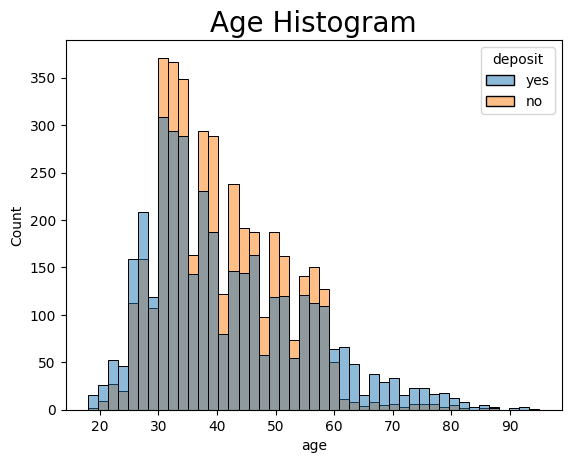

In [100]:
# Age Vs Deposit
sns.histplot(data=data,x='age',hue='deposit')
plt.title('Age Histogram',fontsize=20)

Dapat dilihat di atas bahwa terdapat kecenderungan pembukaan deposito di rentang usia berikut:
1. di bawah 30 tahun
1. di atas 60 tahun
Sedangkan nasabah di rentang usia 30-60 cenderung tidak membuka deposito

Untuk analisis lebih lanjut, akan dilihat persentase pembukaan deposito di setiap titik usia

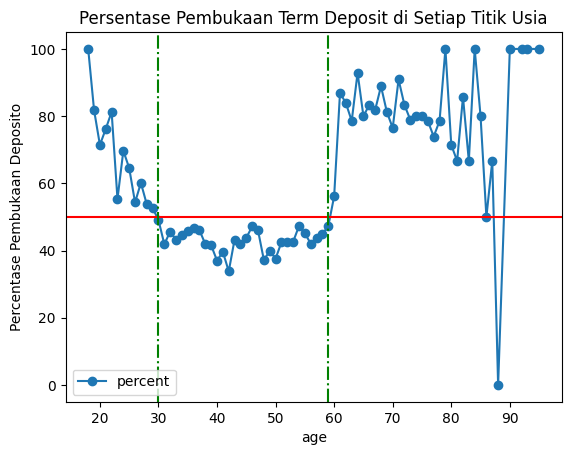

In [101]:
age_deposit=pd.pivot_table(data=data,index="age",columns="deposit",aggfunc="count",values="balance").fillna(0)
age_deposit["percent"]=age_deposit["yes"]/(age_deposit["yes"]+age_deposit["no"])*100
age_deposit.sort_values(ascending=True,by="age",inplace=True)
age_deposit=age_deposit.reset_index()
age_deposit.plot(x="age",y="percent",marker="o")
plt.axhline(y = 50, color = 'r', linestyle = '-') 
plt.axvline(x = 30, color = 'g', linestyle = '-.') 
plt.axvline(x = 59, color = 'g', linestyle = '-.') 
plt.ylabel("Percentase Pembukaan Deposito")
plt.title("Persentase Pembukaan Term Deposit di Setiap Titik Usia")

plt.show()

Analisis: 
- Terdapat rentang usia, dimana lebih dari 50% nasabah membuka deposito, yaitu di rentang usia <30 tahun dan rentang usia di atas 59 tahun (usia pensiun).
- Hubungan usia dengan pembukaan deposito asosiasinya tidak linier (semakin tinggi usia, kecenderungan untuk membuka deposito tidak selalu meningkat, tetapi bergantung pada range usianya)

Note: Garis merah merupakan penanda untuk nilai persentase pembukaan deposito sebesar 50% dari jumlah nasabah di usia yang sama

#### J2. Balance Vs Deposit

In [102]:
#Analsisis Balance Vs Deposit
balance_age=data.groupby(['job'])['balance'].agg(["mean", "median", "std", "min", "max"])
column_rename = {'mean': 'Mean', 'median': 'Median','std': 'Standard Deviation','min':'Minimum','max': 'Maximum'}
balance_age= balance_age.rename(columns = column_rename).sort_values(by="Mean",ascending=False)
balance_age

,Mean,Median,Standard Deviation,Minimum,Maximum
job,,,,,
retired,2160.320370,1039.5,3509.552308,-1206,37127
self-employed,1966.928571,658.0,5077.161863,-3058,52587
entrepreneur,1905.360169,542.0,4989.704247,-1965,51439
management,1765.964785,637.0,3220.605545,-6847,36252
technician,1572.825446,523.0,3179.577903,-1944,45248
student,1423.425101,474.0,2779.164980,0,23878
unemployed,1387.858086,588.0,2358.882436,-825,19268
housemaid,1322.711957,365.5,2693.250868,-1531,26965
blue-collar,1237.545793,457.0,2887.537690,-1489,66653


Rata-rata balance positif tertinggi ada nasabah:
 - Sudah usia pensiun (retired) -> baik dari sisi mean maupun median bernilai paling besar
 - Pekerja wiraswasta dan pebisnis. 

Median <<< Mean, artinya di setiap kategori pekerjaan terdapat nasabah/klien yang memiliki balance yang cukup tinggi dibanding lainnya (kemungkinan adanya outliers)

Text(0.5, 1.0, 'Balance Histogram')

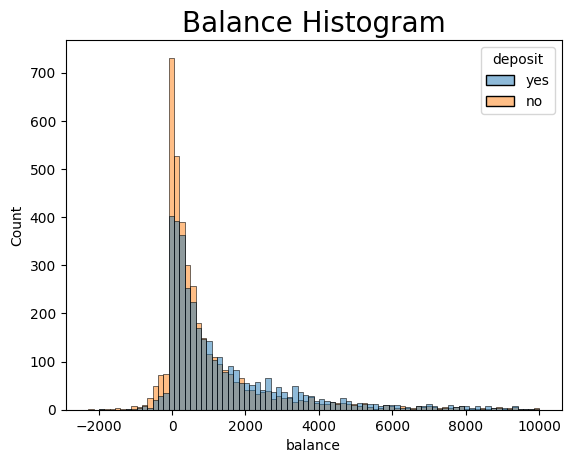

In [103]:
# Balance Vs Deposit
sns.histplot(data=data[(data["balance"]<10000) & (data["balance"]>-2500)],x='balance',hue='deposit')
plt.title('Balance Histogram',fontsize=20)

Analisis:
1. Terdapat indikasi bahwa nasabah yang cenderung lebih memilih membuka deposito berjangka memiliki nilai balance melebihi 1000. 
1. Terdapat asosiasi positif antara balance dengan pembukaan deposito berjangka.
1. Pada usia pensiun (>60) tahun cenderung memiliki balance yang besar dan juga lebih memilih untuk membuka deposito.

### J3. Campaign dan Pdays Vs Deposit

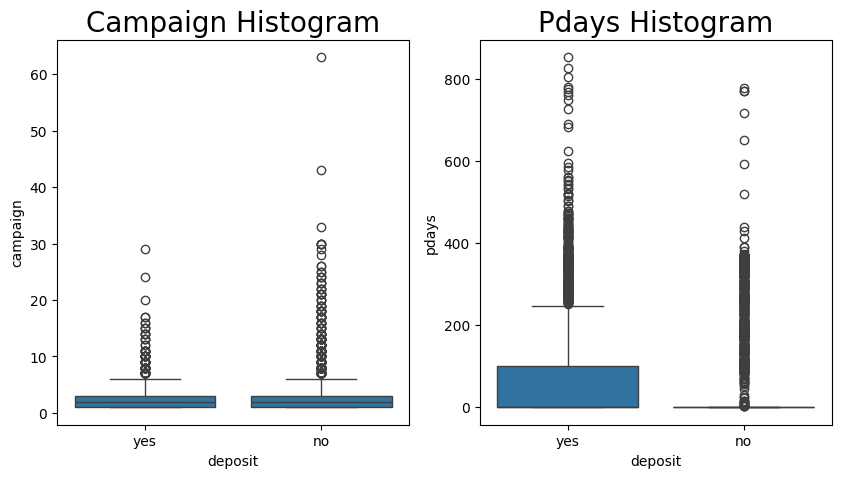

In [104]:
plt.figure(figsize=(10,5))
for i,j in enumerate(num[2:]):
    plt.subplot(1,2,i+1)
    sns.boxplot(data,y=j,x='deposit')
    plt.title(j.capitalize()+' Histogram',fontsize=20)

plt.show()

Analisis:
1. Berdasarkan data campaign, semakin banyak dihubungi pada saat kampanye, maka semakin turun kecenderungan untuk membuka deposito (asosiasi negatif)
1. Nasabah yang membuka deposito didominasi oleh nasabah yang dihubungi <200 hari setelah campaign (asosiasi positif)

Note:
-	campaign: Number of contacts performed during this campaign and for this client.
-	pdays: Number of days after the client was contacted from the previous campaign.


## K. Feature Engineering

- Pemilihan variabel/kolom mana saja yang akan digunakan sebagai feature perlu dilakukan agar prinsip parsimony dalam pemodelan dapat terpenuhi. Salah satu caranya adalah dengan melihat korelasi dan asosiasi antara variable feature dengan variable target.
- Prinsip Parsimony: when there are multiple explanations for observed data, the simplest one is preferred
- Pada bagian I, sudah dilakukan chi-square test untuk feature dengan tipe data kategorikal. Hasil test chi-squared menunjukkan bahwa seluruh feature kategorikal memiliki asosiasi dengan variabel target.
- Selanjutnya akan dicek terlebih dahulu apakah terdapat korelasi antara seluruh feature numerik dengan variabel target menggunakan korelasi spearman rho.

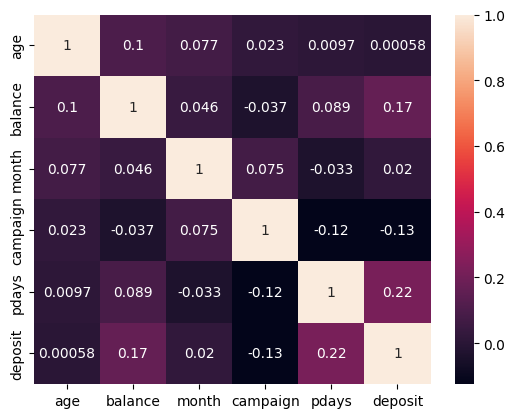

In [105]:
#define target
data["deposit"]=np.where(data["deposit"]=="yes",1,0)

#Check korelasi
sns.heatmap(data.select_dtypes(exclude="object").corr("spearman"),annot=True)
plt.show()

Hasil analisis korelasi: 
- Nilai korelasi dari age dan month terhadap deposit <10%, sehingga akan diexclude dari feature.
- Feature yang akan digunakan dalam pemodelan:
    - Feature kategorikal : job, housing, loan, contact, month
    - Feature numerical: balance, campaign, pdays

Selanjutnya akan dilakukan preprocessing sebagai berikut:
- Seluruh variabel kategori dengan jumlah kategori <= 5, yaitu housing, loan dan contact akan diencoding menggunakan One Hot Encoding (Pembentuka Dummy Variable)
- Variabel kategori dengan jumlah kategori > 5, yaitu job akan diencoding menggunakan Binary Encoding
- Akan dilakukan scalling untuk seluruh variabel numerik untuk menyamakan skala pada data. Dapat dilihat bahwa terdapat ketimpangan skala nilai pada data original, misalnya untuk data campaign nilai terbesar puluhan, sedangkan untuk balance nilainya mencapai ribuan. Perbedaan skala ini akan mengganggu analisis feature importance.

In [106]:
# Define Feature
x=data.drop(columns=["deposit","age","month"])

# Define Target
y=data["deposit"]

# Re-Define kolom categorical dan numerical
kat = x.select_dtypes(include=['object']).columns.tolist()
num = x.select_dtypes(exclude=['object']).columns.tolist()

In [107]:
# Scalling and Encoding
preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(drop='first',sparse_output=False), ['housing','loan', 'contact']),
    ('binary', ce.BinaryEncoder(),['job']),
    ('scalling',RobustScaler(),num)
], remainder='passthrough')

Setelah membuat pipeline untuk scaling, maka data akan dipecah menjadi 2 bagian, yaitu 80% data untuk membangun model (train data) dan 20% data akan digunakan untuk mengetes model yang sudah dibangun (test data)

In [108]:
#Split data
xtrain,xtest,ytrain,ytest=train_test_split(
    x,y,
    random_state=200,
    test_size=0.2,
    stratify=y #y antara 0 dan 1 maunya proporsional
    )
xtrain

,job,balance,housing,loan,contact,campaign,pdays
7115,technician,0,no,no,cellular,2,-1
5023,retired,1612,no,no,cellular,2,-1
1914,management,640,no,no,cellular,4,213
2585,blue-collar,4622,yes,yes,other,1,-1
6876,retired,21,yes,no,telephone,2,-1
...,...,...,...,...,...,...,...
5370,blue-collar,3764,no,no,telephone,3,181
3441,blue-collar,751,yes,no,cellular,5,-1
44,management,412,no,no,telephone,6,-1
6455,technician,1466,yes,no,other,1,-1


## K. Modelling - Base Models

Terdapat 4 base model yang akan digunakan sebagai model awal, yaitu:
1. Logistic Regression
1. KNN (K-Nearest Neighbour)
1. Decision Tree
1. SVM/SVC

Untuk setiap model di atas, akan dicari parameter terbaik, yang di lihat dari 2 pengukuran berikut:
1. Nilai metric precision untuk data test cukup tinggi
1. Nilai metric precision untuk data test vs data train tidak timpang (selisih absolut tidak melebihi 5%)

In [109]:
# Logistic Regression: Find the Best Solver
solvers=['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

# Initial Value
presc_train=[]
presc_test=[]
score_logreg_test=0

for i in solvers:
    #Pipeline SVC
    logit_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver=i,random_state=200))
    ])
    logit_pipeline.set_output(transform="pandas")
    logit_pipeline.fit(xtrain,ytrain)

    # Data Train
    pred=logit_pipeline.predict(xtrain)
    presc_train_i=precision_score(ytrain,pred)
    presc_train.append(presc_train_i)

    # Data Test
    pred=logit_pipeline.predict(xtest)
    presc_test_i=precision_score(ytest,pred)
    presc_test.append(presc_test_i)

    if ((score_logreg_test<presc_test_i) and (abs(presc_test_i-presc_train_i)<0.05)):
       # Precision Score Result
       score_logreg_test=presc_test_i
       score_logreg_train=presc_train_i

       # Parameter dan Koef Regresi
       best_solver=i
       intercept=logit_pipeline.named_steps['classifier'].intercept_
       coef=logit_pipeline.named_steps['classifier'].coef_
       feature=logit_pipeline.named_steps['classifier'].feature_names_in_

print(f"Precision Score Train: {score_logreg_train}")       
print(f"Precision Score Test: {score_logreg_test}")
print(f"Best Solver: {best_solver}")
print(f"Intercept: {intercept}")
logreg_result=pd.DataFrame({"Feature":feature,"Koefisien Regresi":coef[0]})
logreg_result

Precision Score Train: 0.637997432605905
Precision Score Test: 0.6418109187749668
Best Solver: lbfgs
Intercept: [0.51346564]


,Feature,Koefisien Regresi
0,onehot__housing_yes,-0.713511
1,onehot__loan_yes,-0.581009
2,onehot__contact_other,-1.135267
3,onehot__contact_telephone,-0.360181
4,binary__job_0,-0.202186
5,binary__job_1,-0.054193
6,binary__job_2,0.102223
7,binary__job_3,-0.104370
8,scalling__balance,0.069668
9,scalling__campaign,-0.244986


Precision Score Train: 0.6956201693043799
Precision Score Test: 0.6753846153846154
Best K: 47


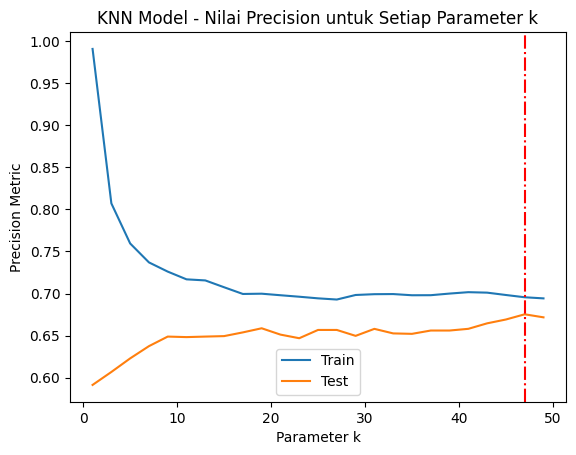

In [110]:
# KNN : Search Best-k
k=np.arange(1,51,2)

# Initial Value
presc_train=[]
presc_test=[]
score_knn_test=0
k_best=1

for i in k:
    knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(i))
    ])
    knn_pipeline.fit(xtrain,ytrain)

    # Data Train
    pred=knn_pipeline.predict(xtrain)
    presc_train_i=precision_score(ytrain,pred)
    presc_train.append(presc_train_i)

    # Data Test
    pred=knn_pipeline.predict(xtest)
    presc_test_i=precision_score(ytest,pred)
    presc_test.append(presc_test_i)

    if ((score_knn_test<presc_test_i) and (abs(presc_test_i-presc_train_i)<0.05)):
       # Precision Score Result
       score_knn_test=presc_test_i
       score_knn_train=presc_train_i
       
       # Parameter
       k_best=i

print(f"Precision Score Train: {score_knn_train}")       
print(f"Precision Score Test: {score_knn_test}")
print(f"Best K: {k_best}")

plt.plot(k,presc_train)
plt.plot(k,presc_test)
plt.legend(["Train","Test"])
plt.xlabel("Parameter k")
plt.ylabel("Precision Metric")
plt.title("KNN Model - Nilai Precision untuk Setiap Parameter k")
plt.axvline(x = k_best, color = 'r', linestyle = '-.') 
plt.show()


Precision Score Train: 0.7266666666666667
Precision Score Test: 0.7253668763102725
Best Depth: 4
Best Crit: log_loss


Text(0.5, 1.0, 'Decision Tree Precision Metric - Best Dept & Criterion')

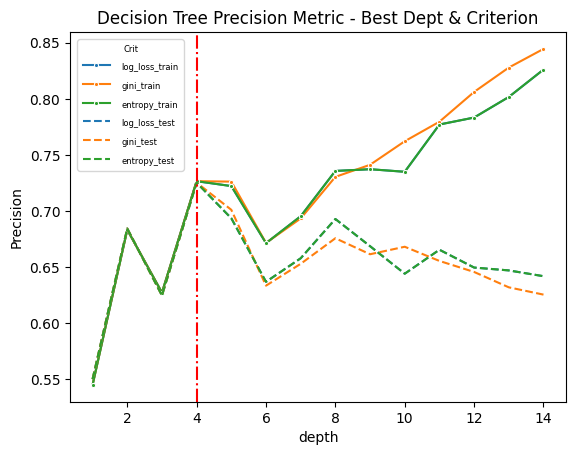

In [111]:
# Decision Tree: Find Max depth
crit=["log_loss","gini","entropy"]
maxd=np.arange(1,15,1)

# Initial Value
presc_train = pd.DataFrame(columns=["depth","Precision","Crit"])
presc_test = pd.DataFrame(columns=["depth","Precision","Crit"])
score_dt_test=0
k=0

for i in crit:
    for j in maxd:
        #Pipeline Dt
        dt_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(criterion=i,max_depth=j,random_state=200))
        ])
        dt_pipeline.fit(xtrain,ytrain)

        # Data Train
        pred=dt_pipeline.predict(xtrain)
        presc_train_i=precision_score(ytrain,pred)
        presc_train.loc[k,"Precision"]=presc_train_i
        presc_train.loc[k,"Crit"]=i+"_train"
        presc_train.loc[k,"depth"]=j

        # Data Test
        pred=dt_pipeline.predict(xtest)
        presc_test_i=precision_score(ytest,pred)
        presc_test.loc[k,"Precision"]=presc_test_i
        presc_test.loc[k,"Crit"]=i+"_test"
        presc_test.loc[k,"depth"]=j
        k=k+1

        if ((score_dt_test<presc_test_i) and (abs(presc_test_i-presc_train_i)<0.05)):
            score_dt_test=presc_test_i
            score_dt_train=presc_train_i
       
            best_depth=j
            best_crit=i

print(f"Precision Score Train: {score_dt_train}")       
print(f"Precision Score Test: {score_dt_test}")
print(f"Best Depth: {best_depth}")
print(f"Best Crit: {best_crit}")

ax=sns.lineplot(presc_train,x="depth",y="Precision",hue="Crit",marker=".")
sns.lineplot(presc_test,x="depth",y="Precision",hue="Crit",linestyle='--')
sns.move_legend(ax, "upper left")
plt.axvline(x = best_depth, color = 'r', linestyle = '-.') 
plt.setp(ax.get_legend().get_texts(), fontsize='6') 
plt.setp(ax.get_legend().get_title(), fontsize='6') 
plt.title("Decision Tree Precision Metric - Best Dept & Criterion")

In [112]:
# SVC: Find the Best Kernel
kernels=["linear","poly","rbf","sigmoid"]

# Initial Value
presc_train=[]
presc_test=[]
score_svm_test=0

for i in kernels:
    #Pipeline SVC
    svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', svm.SVC(kernel=i))
    ])
    svm_pipeline.fit(xtrain,ytrain)

    # Data Train
    pred=svm_pipeline.predict(xtrain)
    presc_train_i=precision_score(ytrain,pred)
    presc_train.append(presc_train_i)

    # Data Test
    pred=svm_pipeline.predict(xtest)
    presc_test_i=precision_score(ytest,pred)
    presc_test.append(presc_test_i)

    if ((score_svm_test<presc_test_i) and (abs(presc_test_i-presc_train_i)<0.05)):
       score_svm_test=presc_test_i
       score_svm_train=presc_train_i
       best_kernel=i

print(f"Precision Score Train: {score_svm_train}")       
print(f"Precision Score Test: {score_svm_test}")
print(f"Best Kernel: {best_kernel}")

Precision Score Train: 0.7164293959215082
Precision Score Test: 0.6892744479495269
Best Kernel: rbf


### Best Base Model

In [113]:
# Summary
base_model=pd.DataFrame({
    "Model":["Logistic Regression","K Nearest Neighbour","Decision Tree","SVM"],
    "Model Name":["logreg","knn","dt","svm"],
    "Precision Train":[score_logreg_train,score_knn_train,score_dt_train,score_svm_train],
    "Precision Test":[score_logreg_test,score_knn_test,score_dt_test,score_svm_test]
})

base_model.sort_values(by="Precision Test",ascending=False)

,Model,Model Name,Precision Train,Precision Test
2,Decision Tree,dt,0.726667,0.725367
3,SVM,svm,0.716429,0.689274
1,K Nearest Neighbour,knn,0.695620,0.675385
0,Logistic Regression,logreg,0.637997,0.641811


In [114]:
# Final base model
logreg = LogisticRegression(solver=best_solver)
knn = KNeighborsClassifier(k_best)
dt = DecisionTreeClassifier(criterion=best_crit,max_depth=best_depth)
svm=svm.SVC(kernel=best_kernel)

## L. Ensamble Model

Selain base model, kita dapat menggunakan ensamble model untuk mencari model yang lebih baik. Urutan best base model yang sudah diperoleh sebelumnya akan menjadi acuan utama dalam membentuk ensamble model.

In [115]:
#Voting Classification (hard voting-hasil akhir dominan)
hard_vote=VotingClassifier([
    ("KNN",knn),
    ("SVM",svm),
    ("dt",dt)
],voting="hard")

#Stacking (hard voting - meta learner=knn)
stc=StackingClassifier([
    ("KNN",knn),
    ("SVM",svm),
    ("dt",dt)
],final_estimator=dt)

#Ensemble Single Type - Bootsrap
rf = RandomForestClassifier(n_estimators=300)
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()
ada=AdaBoostClassifier(n_estimators=300)
bag=BaggingClassifier(estimator=svm)


## M. Cross Validation

- Cross Validation dilakukan untuk memperoleh model yang lebih general (tidak overfitting maupun underfitting)
- Cross Validation bekerja dengan cara merubah kompisisi data yang digunakan untuk melakukan training dan testing, berdasarkan parameter fold yang ditentukan

In [116]:
#Cross Validation - Basic Model
models = [logreg,knn,dt,svm,hard_vote,stc,rf,xgb,lgbm,ada,bag]
score=[]
rata2=[]
std=[]
skfold=StratifiedKFold(n_splits=10,random_state=2004,shuffle=True)

#Cross Validation Process
for i in models:
    estimator=Pipeline([
        ('preprocess',preprocessor),
        ('model',i)])
    model_cv=cross_val_score(estimator,xtrain,ytrain,cv=skfold,scoring='precision')
    score.append(model_cv)
    rata2.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'Nama Model':['Logistic Regression', 'KNN', 'Decision Tree','SVM',"Hard Vote","Stacking","Random Forest","XGBoost","LightGBoost","Adaptive Boosting","Bagging-SVM"],\
              'Mean Precision':rata2,'sdev':std}).set_index('Nama Model').sort_values(by='Mean Precision',ascending=False)

[LightGBM] [Info] Number of positive: 2685, number of negative: 2934
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 550
[LightGBM] [Info] Number of data points in the train set: 5619, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.477843 -> initscore=-0.088686
[LightGBM] [Info] Start training from score -0.088686
[LightGBM] [Info] Number of positive: 2685, number of negative: 2934
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 552
[LightGBM] [Info] Number of data points in the train set: 5619, number of used features: 11
[LightGBM] [Info] [binary:

,Mean Precision,sdev
Nama Model,,
Decision Tree,0.717848,0.033659
Stacking,0.705811,0.026978
Hard Vote,0.703189,0.015139
SVM,0.698833,0.021111
Bagging-SVM,0.696303,0.023976
LightGBoost,0.684189,0.022777
Adaptive Boosting,0.675151,0.019901
KNN,0.673800,0.018596
XGBoost,0.665572,0.018379


Berdasarkan hasil cross validation, maka dipilih 3 model terbaik, yaitu:
1. Decision Tree
1. Stacking dengan menggunakan final estimator decision tree
1. Hard Vote berdasarkan 3 base model terbaik, yaitu knn, dt dan svm

## N. Hyperparameter Tuning

In [117]:
# Random Search Decision Tree
pipe_dth=Pipeline([
    ("preprocessing",preprocessor),
    ("modelling",DecisionTreeClassifier(random_state=200))
])
hyper_param= {
    "modelling__criterion": ['log_loss','gini', 'entropy'], 
    "modelling__max_depth": np.arange(1,10,2),
    "modelling__min_samples_split": np.arange(1,100,10),
    "modelling__min_samples_leaf": np.arange(1,100,10)
}

dt_hype=GridSearchCV(estimator=pipe_dth,
                   scoring="precision",
                   cv=10,
                   n_jobs=-1,
                   param_grid=hyper_param)
dt_hype.fit(xtrain,ytrain)
print(dt_hype.best_params_)
print(dt_hype.best_score_)

{'modelling__criterion': 'log_loss', 'modelling__max_depth': 5, 'modelling__min_samples_leaf': 1, 'modelling__min_samples_split': 41}
0.6816827753534627


Berdasarkan hasil hyperparameter tuning di atas, maka base model masih lebih baik, sehingga model yang dipilih adalah **decision tree**.

## O. Final Model & Explanation

### O1. Chosen Model

1. Berdasarkan proses pemodelan sebelumnya, diperoleh model terbaik,yaitu decision tree dengan depth 4 dan criterion log_loss yang memiliki nilai Mean Precision tertinggi yaitu 0.7208 dan sdev precision yang cukup rendah, yaitu sebesar 0.0171.
1. Target/dependent variable yang didefinisikan pada model adalah kolom deposito, dimana:
    - 0: No/Tidak membuka deposito
    - 1: Yes/Membuka deposito
1. Kolom selain deposit dipilih sebagai feature apabila memiliki asosiasi yang cukup kuat dengan target variable. Asosiasi diukurur menggunakan chi square test untuk feature categorical dan spearman rho untuk feature numerik.
1. Feature/explanatory variable/independent variable yang terpilih dan digunakan dalam model prediksi meliputi 7 variable, yaitu: job, balance, housing, loan, contact, campaign, pdays. 
1. Pada proses pemodelan, sebelum dilakukan proses fitting model, tahap preprocessing telah dilakukan terhadap feature, yaitu:
    - Mengimplementasikan One Hot Encoder pada feature housing,loan,contact
    - Mengimplementasikan Binary Encoder pada feature job (karena memiliki katagori>5)
    - Menerapkan robustscaller pada feature numerik (balance,campaign,pdays)
1. Setelah dilakukan preprocessing, jumlah kolom feature yang sebelumnya 7 kolom menjadi 11 kolom. Data inilah yang selanjutnya digunakan dalam proses pemodelan
1. Setelah dilakukan tahap pre processing, row data selanjutnya dipisahkan menjadi 2, yaitu data training (80% dari baris data) dan data testing (20% dari baris data).
1. Data training selanjutnya digunakan dalam proses fitting dan data testing digunakan dalam prediksi. 
1. Hasil decision tree dapat divisualisasikan dalam bentuk grafik/bagan (lihat di bagian selanjutnya)

Keseluruhan pipeline dan data setelah proses preprocessing dapat dilihat di bawah ini:

In [118]:
#Best Model
print(f"Best Depth: {best_depth}")
print(f"Best Crit: {best_crit}")

dt_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(criterion=best_crit,max_depth=best_depth))
        ])
dt_pipeline.fit(xtrain,ytrain)

Best Depth: 4
Best Crit: log_loss


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['housing', 'loan',
                                                   'contact']),
                                                 ('binary', BinaryEncoder(),
                                                  ['job']),
                                                 ('scalling', RobustScaler(),
                                                  ['balance', 'campaign',
                                                   'pdays'])])),
                ('classifier',
                 DecisionTreeClassifier(criterion='log_loss', max_depth=4))])

In [119]:
# Show feature for train data after preprocessing
xtrain_encoded=dt_pipeline.named_steps['preprocessor'].fit_transform(xtrain)
print(f"Kolom Feature After Encoding: {xtrain_encoded.columns.tolist()}")
pd.DataFrame.to_excel(xtrain_encoded,"xtrain_encoded.xlsx")
pd.DataFrame.to_excel(ytrain,"ytrain.xlsx")
xtrain_encoded

Kolom Feature After Encoding: ['onehot__housing_yes', 'onehot__loan_yes', 'onehot__contact_other', 'onehot__contact_telephone', 'binary__job_0', 'binary__job_1', 'binary__job_2', 'binary__job_3', 'scalling__balance', 'scalling__campaign', 'scalling__pdays']


,onehot__housing_yes,onehot__loan_yes,onehot__contact_other,onehot__contact_telephone,binary__job_0,binary__job_1,binary__job_2,binary__job_3,scalling__balance,scalling__campaign,scalling__pdays
7115,0.0,0.0,0.0,0.0,0,0,0,1,-0.359670,0.0,0.000000
5023,0.0,0.0,0.0,0.0,0,0,1,0,0.682178,0.0,0.000000
1914,0.0,0.0,0.0,0.0,0,0,1,1,0.053967,1.0,3.611814
2585,1.0,1.0,1.0,0.0,0,1,0,0,2.627565,-0.5,0.000000
6876,1.0,0.0,0.0,1.0,0,0,1,0,-0.346098,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
5370,0.0,0.0,0.0,1.0,0,1,0,0,2.073033,0.5,3.071730
3441,1.0,0.0,0.0,0.0,0,1,0,0,0.125707,1.5,0.000000
44,0.0,0.0,0.0,1.0,0,0,1,1,-0.093392,2.0,0.000000
6455,1.0,0.0,1.0,0.0,0,0,0,1,0.587817,-0.5,0.000000


## O2. Decision Tree Graph

Model decision tree yang terbentuk dapat dilihat pada visualisasi graph di bawah ini. Graph di bawah ini menunjukkan bagaimana model bekerja dalam memprediksi klasifikasi apakah seorang nasabah akan membuka deposito/tidak. Penjelasan untuk salah satu cabang yang terbentuk adalah sebagai berikut:
1. Step 1: Model memisahkan berdasarkan kondisi feature onehot_contact_other
    - Jika  onehot_contact_other<=0.5, maka masuk ke klasifikasi Deposito=0 (No).
    - Dapat dilihat dari 6244 baris xtrain, 1289 bernilai false.
1. Step 2: Setelah step 1, model memisahkan lebih lanjut berdasarkan kondisi scalling__pdays 
    - Jika scalling__pdays≤ 0.641, maka masuk ke klasifikasi Deposito=0 (No).
    - Dapat dilihat dari 1289 baris dari step 1, 11 baris bernilai False.
1. Step 3. Setelah step 2, model memisahkan lebih lanjut berdasarkan scalling__pdays 
    - Jika scalling__pdays≤ 9.713, maka masuk ke klasifikasi Deposit=1 (Yes)
    - Berdasarkan hasil akhir klasifikasi, terdapat 8 data True dan 3 data false. 
    - Jika dilihat dari value yang terbentuk untuk masing-masing klasifikasi:
        - Cabang di sisi kiri menunjukkan value=[0,8], artinya data asli menunjukkan seluruh target bernilai Deposit=1 (Yes)
        - Cabang di sisi kanan menunjukkan value=[3,0], artinya data asli menunjukkan seluruh target bernilai Deposit=0 (False)
        - Value sesuai dengan sample, sehingga dapat disimpulkan pada percabangan ini, seluruh nilai prediksi sesuai dengan nilai aslinya (accuracy 100%)

Note cara membaca graph untuk leaf yang terbawah:
- log_loss = 0.799
- samples = 772
- value = [585, 187]
- class = Deposit 0: No

Artinya: 
Dari sample sebanyak 772 baris dikategorikan sebagai class = Deposit 0: No, namun pada kenyataanya sebanyak 187 data bernilai Deposit 1: Yes / terjadi False Positive. Semakin rendah log_loss, maka hasil prediksi semakin akurat.

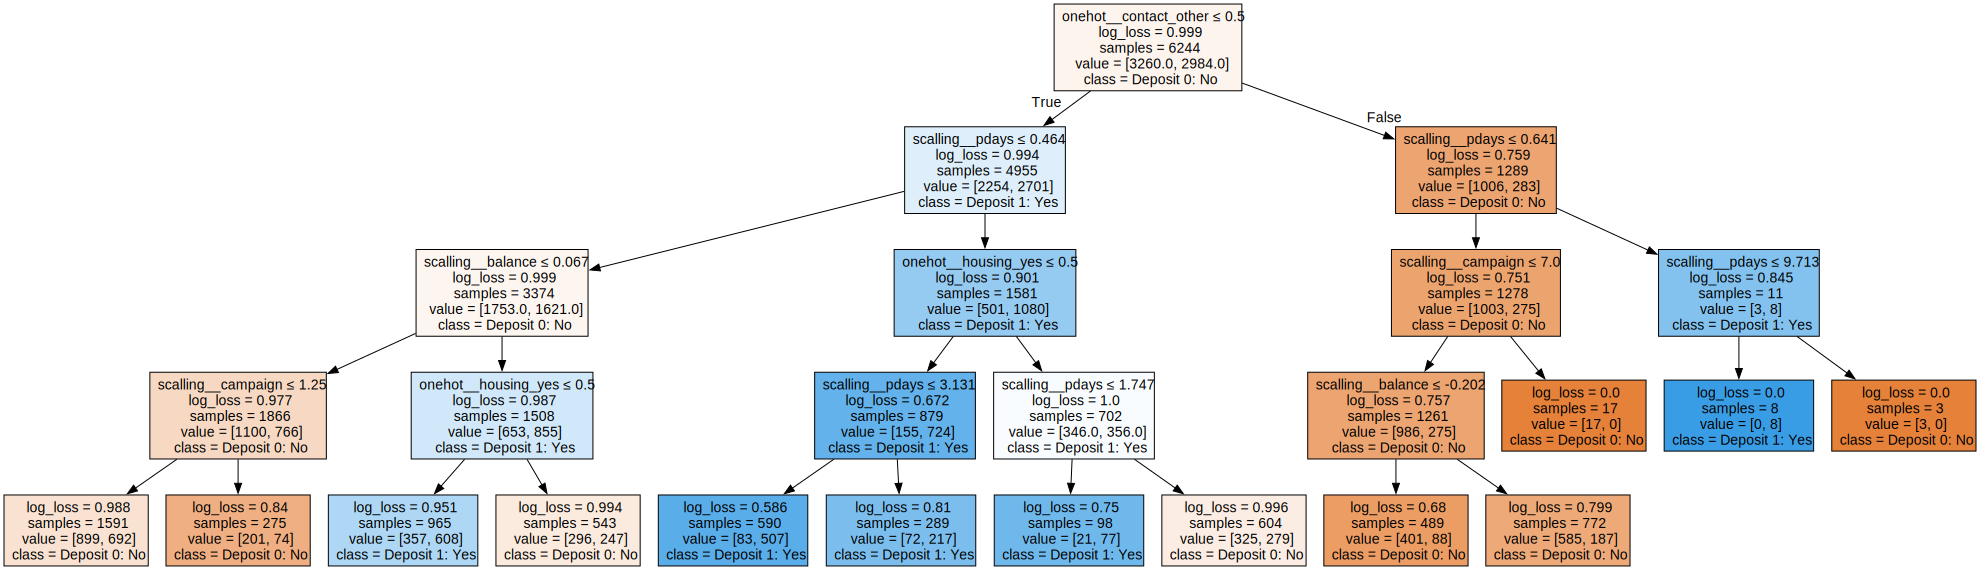

In [120]:
#install graphviz: https://graphviz.org/download/
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

#Feature column list
feature_list=dt_pipeline.named_steps['classifier'].feature_names_in_.tolist()
feature_list

#Visualization of decision tree
dot_data=tree.export_graphviz(dt_pipeline.named_steps['classifier'],out_file=None,filled=True,rounded=False,special_characters=True,feature_names=feature_list,class_names=['Deposit 0: No','Deposit 1: Yes'])
graph = graphviz.Source(dot_data)  
graph.format = "png"
graph.render("DT_result_visualization")
graph

Berdasarkan Graph di atas, maka pada beberapa kasus akurasi prediksi pembukaan deposito (Deposito 0: Yes) cukup tinggi, yang ditandai dengan nilai log_loss yang kecil, diantaranya nasabah dengan karakteristik berikut:
1. contact other dan pdays tinggi (log_loss=0)
1. contact other , pdays rendah, tetapi campaign tinggi (log_loss=0)
1. contact melalui telepon atau hp, pdays tinggi dan tidak ada loan (log_loss 0.586)

## O3. Feature Importance

Untuk melihat feature yang paling berpengaruh, maka dapat dilakukan analisis feature importance. Beerdasarkan analisis feature importance di bawah ini, dapat dilihat bahwa hanya ada 5 dari 11 feature yang berpengaruh terhadap keputusan deposito, secara terurut sbb:
1. onehot__contact_other / other (42.8%)
1. scalling_pdays / pdays (24.32%)
1. onehot_housing_yes / housing (21.13%)
1. scalling_balance / balance (8.3%)
1. scalling_campaign / campaign (3.4%)

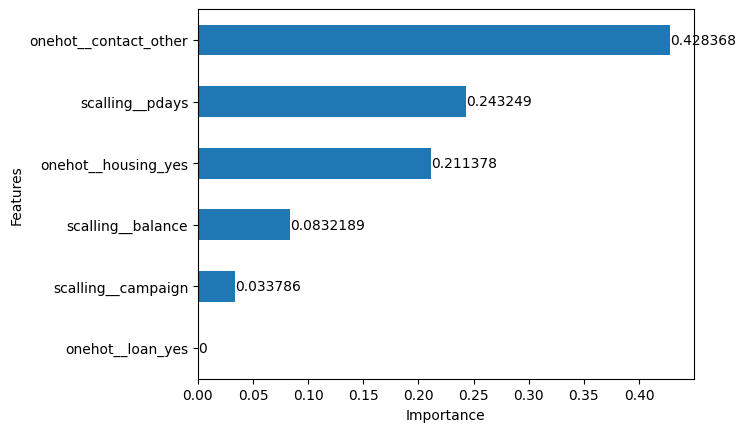

In [122]:
# Feature Importance
dt_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(criterion=best_crit,max_depth=best_depth))
        ])
dt_pipeline.fit(xtrain,ytrain)

feat_importances = pd.Series(dt_pipeline.named_steps["classifier"].feature_importances_, index=dt_pipeline.named_steps['classifier'].feature_names_in_)
ax=feat_importances.nlargest(6).sort_values().plot(kind='barh')
plt.ylabel("Features")
plt.xlabel("Importance")
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

## P. Financial Analysis & Recommendation

Akan dilakukan analisis kerugian untuk 2 kondisi/opsi berikut:
1. Opsi A: Jika marketing campaign dilakukan tanpa pertimbangan hasil prediksi (seluruh nasabah ditargetkan dalam campaign)
1. Opsi B: Jika marketing campaign dilakukan dengan mempertimbangkan hasil prediksi (hanya nasabah yang diprediksi akan membuka deposito yang akan ditargetkan dalam campaign)

Kerugian didefinisikan sebagai total biaya marketing campaign yang sudah dikeluarkan untuk nasabah per tahunnya (CAC) yang pada akhirnya tidak membuka term deposit.

***Kerugian = CAC x jumlah nasabah yang tidak membuka deposito tetapi termasuk dalam target campaign***

- Opsi A: Jika marketing campaign dilakukan tanpa pertimbangan hasil prediksi (seluruh nasabah ditargetkan dalam campaign)

    Kerugian Opsi A = 176 * Jumlah Nasabah dengan Nilai Deposito 0 atau No

- Opsi B: Jika marketing campaign dilakukan dengan mempertimbangkan hasil prediksi (hanya nasabah yang diprediksi akan membuka deposito yang akan ditargetkan dalam campaign)

    Kerugian Opsi B = 176 * (jumlah nasabah dengan ypred bernilai 1 - jumlah nasabah dengan yactual bernilai 0)

- Penghematan = Kerugian Opsi A - Kerugian Opsi B

In [132]:
# Total Kerugian tanpa adanya model prediksi
# Kerugian = biaya * jumlah nasabah yang tidak membuka deposito
rugi_nomodel=176*data.loc[data["deposit"]==0,"deposit"].count()
print(f"Rugi Opsi A: {rugi_nomodel}")

# Total Kerugian dengan adanya model prediksi
rugi_model={"Prediksi":dt_pipeline.predict(x),
       "Actual": y}
rugi_model=pd.DataFrame(rugi_model)
rugi_model["Cost"]=176*rugi_model["Prediksi"]
rugi_model["Lost"]=(rugi_model["Prediksi"]-rugi_model["Actual"])*rugi_model["Prediksi"]*176
print(f"Rugi Opsi B: {rugi_model["Lost"].sum()}")

#Penghematan biaya
print(f"Penghematan: {rugi_nomodel-rugi_model["Lost"].sum()}")

Rugi Opsi A: 717200
Rugi Opsi B: 116864
Penghematan: 600336


Rekomendasi Bisnis
1. Gunakan model prediksi untuk memilih nasabah yang menjadi target campaign
1. Jumlah kontak sepanjang campaign memiliki feature significance yang cukup rendah, sehingga pada saat campaign tidak perlu melakukan kontak secara excessive.
1. Utamakan nasabah yang tidak memiliki loan home dan memiliki jalur komunikasi via telepon atau hp. Jika ingin menghubungi untuk kembali menawarkan, sebaiknya jangan terlalu jauh dengan waktu campaign berakhir.

Rekomendasi Model

Menambahkan fitur lain yang mungkin dapat mempengaruhi keputusan untuk membuka deposito, diantaranya risk appetite nasabah, historis pembukaan deposito, informasi gaji, informasi tujuan utama dalam berinvestasi, status pernikahan, informasi pendidikan terakhir